In [1]:
import torch
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import copy
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# tsne_plot_2d('Anna Karenina by Leo Tolstoy', embeddings_ak_2d, a=0.1)

In [2]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import copy
import warnings
# task_embedding = torch.load('task_embedding_chembl.pth').cpu().detach().numpy()
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [14]:
dataset = 'ETTm1'
embedding_list = np.load('./embedding_collect/'+ dataset +'_encoder_output_list_sd.npy',allow_pickle=True)
train_visual = embedding_list[-1]
test_visual = embedding_list[-2]
all_comb = np.concatenate((train_visual,test_visual),axis=0)

In [15]:
import pickle

In [16]:
pred_perf = pd.read_csv('./gain_data/ETT/ETTm1/ETTm1_HOA.csv',sep=' ',header=None).values
mask = pd.read_csv('./gain_data/ETT/ETTm1/ETTm1_mask.csv',sep=' ',header=None).values
visual_mask = np.zeros(all_comb.sum(2).shape)
visual_mask[all_comb.sum(2)!=0]=1
new_index =[]
for i in visual_mask:
    for j in range(len(mask)):
        if((i == mask[j]).all()):
            new_index.append(j)
            continue
HOA_perf=pred_perf[new_index]

In [17]:
pred_perf = pd.read_csv('./gain_data/ETT/ETTm1/ETTm1_TAG_HOA.csv',sep=' ',header=None).values
mask = pd.read_csv('./gain_data/ETT/ETTm1/ETTm1_mask.csv',sep=' ',header=None).values
visual_mask = np.zeros(all_comb.sum(2).shape)
visual_mask[all_comb.sum(2)!=0]=1
new_index =[]
for i in visual_mask:
    for j in range(len(mask)):
        if((i == mask[j]).all()):
            new_index.append(j)
            continue
TAG_perf=pred_perf[new_index]

In [18]:
perf = pd.read_csv('./gain_data/ETT/ETTm1/ETTm1_val_y.csv',sep=' ',header=None).values
mask = pd.read_csv('./gain_data/ETT/ETTm1/ETTm1_mask.csv',sep=' ',header=None).values
import pickle
visual_mask = np.zeros(all_comb.sum(2).shape)
visual_mask[all_comb.sum(2)!=0]=1
new_index =[]
for i in visual_mask:
    for j in range(len(mask)):
        if((i == mask[j]).all()):
            new_index.append(j)
            continue
perf=perf[new_index]
for i in range(len(perf[0])):
    print(i,len(np.where(perf[:,i]>0)[0]),len(np.where(perf[:,i]<0)[0]))

0 29 34
1 30 33
2 33 30
3 23 40
4 12 51
5 43 20
6 63 0


In [19]:
all_task = ['HF','HL','MF','ML','LF','LL','OT']

In [20]:
with open('./log/'+dataset+'/'+ratio+'/pred_pertask_trajactiveper.pkl', "rb") as fp:
    pred_traj = pickle.load(fp)
with open('./log/'+dataset+'/'+ratio+'/mask_pertask_trajactiveper.pkl', "rb") as fp:
    pred_mask = pickle.load(fp)
pred_perf = np.array(pred_traj)[-1]
mask = np.array(pred_mask)[-1]
visual_mask = np.zeros(all_comb.sum(2).shape)
visual_mask[all_comb.sum(2)!=0]=1
new_index =[]
for i in visual_mask:
    for j in range(len(mask)):
        if((i == mask[j]).all()):
            new_index.append(j)
            continue
pred_perf=pred_perf[new_index]
for i in range(len(perf[0])):
    print(i,len(np.where(pred_perf[:,i]>0)[0]),len(np.where(pred_perf[:,i]<0)[0]))

0 23 40
1 27 36
2 42 21
3 12 51
4 2 61
5 58 5
6 63 0


0
1
2
3
4
5
6


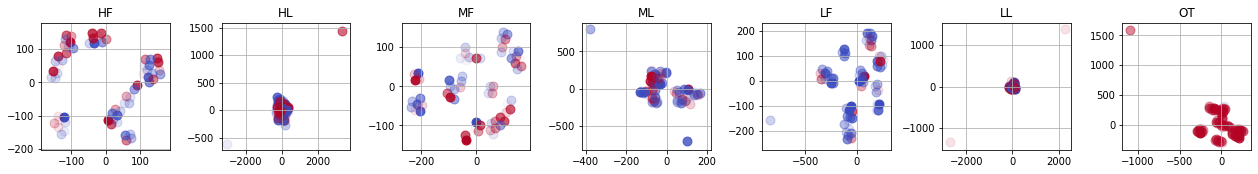

In [21]:
import copy
_perf = copy.deepcopy(perf)
plt.figure(figsize=(21,2.2))
figure_idx = 1
select_task_idx = 2
with_task_idx = 10
for select_task_idx in range(7):
    print(select_task_idx)
    for tmp in [9,]:
        plt.subplot(1,7,figure_idx)
        a = 0.7
        figure_idx = figure_idx + 1
        _perf = copy.deepcopy(perf)
        sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
        selected_comb = all_comb[sel_idx]
        _perf = _perf[sel_idx]
        _a = copy.deepcopy(_perf[:,select_task_idx])
        X = selected_comb[:,select_task_idx,:]
        _perf = _perf[:,select_task_idx]
        perf_max,perf_min = np.max(_perf), np.min(_perf)
        for i in range(len(_perf)):
            if(_perf[i]>0):
                _perf[i] = 1
                _a[i] = _a[i]/(perf_max+0.00001)
            else:
                _perf[i] = -0.5
                _a[i] = _a[i]/(perf_min-0.00001) + 0.1
            if(_a[i]>0.99):
                _a[i] = 1
        X_embedded = TSNE(n_components=2,perplexity=tmp, random_state=3).fit_transform(X)
        keys = list(range(len(X)))
        title = all_task[select_task_idx]
        color=_perf
        embeddings = X_embedded
        label = keys
        plt.title(title)
        x = embeddings[:,0]
        y = embeddings[:,1]
        cmap = matplotlib.cm.get_cmap('coolwarm')
        c = color
        plt.grid(True)
        for i in range(len(x)):
            plt.scatter(x[i], y[i], alpha=_a[i],color=cmap(c[i]), label=label[i],s=80)
plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.4, 
                hspace=0.4)
plt.savefig('ETTm1_embed.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
    # task_embedd_c =tsne_plot_2d(keys,X_embedded,title='Task Representation, MIMIC-27 Task '+str(select_task_idx),color=_perf,show_legend=False,save_fig = False,anchor_xy = [1.05, 0.9],col=4)

0
(-202.849671006325, 178.64490082590802)
1
(-720.3141586050044, 1584.8276554212266)
2
(-163.3268041149419, 162.91304014502012)
3
(-817.8369383952431, 880.63574384067)
4
(-275.193111664344, 232.17386594257405)
5
(-1518.1008576121374, 1517.3325809161283)
6
(-414.19713686215607, 1709.2794568076165)


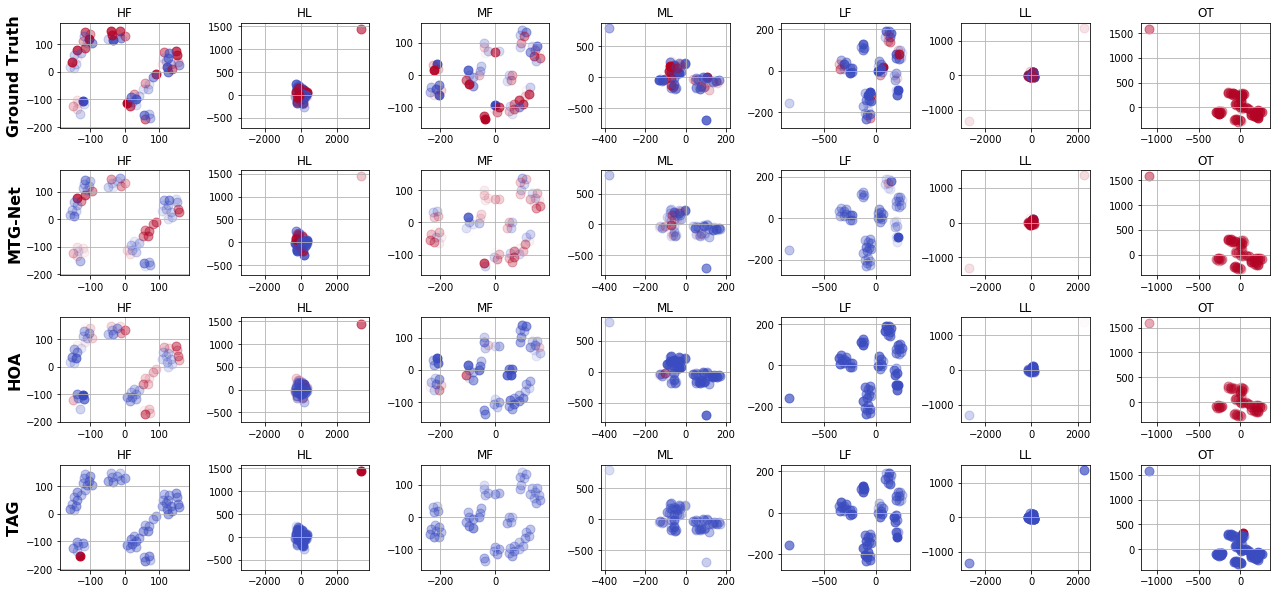

In [25]:
import copy
_perf = copy.deepcopy(perf)
plt.figure(figsize=(21,9.5))
figure_idx = 1
select_task_idx = 2
with_task_idx = 10
for select_task_idx in range(7):
    print(select_task_idx)
    for tmp in [9]:
        a = 0.7
        _perf = copy.deepcopy(perf)
        sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
        selected_comb = all_comb[sel_idx]
        _perf = copy.deepcopy(perf)
        _pred_perf = copy.deepcopy(pred_perf)
        _HOA_perf = copy.deepcopy(HOA_perf)
        _TAG_perf = copy.deepcopy(TAG_perf)
        sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
        selected_comb = all_comb[sel_idx]
        _perf = _perf[sel_idx]
        _pred_perf = _pred_perf[sel_idx]
        _HOA_perf = _HOA_perf[sel_idx]
        _TAG_perf = _TAG_perf[sel_idx]
        _a = copy.deepcopy(_perf[:,select_task_idx])
        _perf = _perf[:,select_task_idx]
        perf_max,perf_min = np.max(_perf), np.min(_perf)
        TAG_max,TAG_min = np.max(_TAG_perf), np.min(_TAG_perf)
        _a_pred = copy.deepcopy(_pred_perf[:,select_task_idx])
        _pred_perf = _pred_perf[:,select_task_idx]
        _a_HOA = copy.deepcopy(_HOA_perf[:,select_task_idx])
        _HOA_perf = _HOA_perf[:,select_task_idx]
        _a_TAG = copy.deepcopy(_TAG_perf[:,select_task_idx])
        _TAG_perf = _TAG_perf[:,select_task_idx]
        label, pred_label, HOA_label, TAG_label = [] , [] , [] ,[]
        X = selected_comb[:,select_task_idx,:]
        for i in range(len(_perf)):
            if(_perf[i]>=0):
                _perf[i] = 1
                _a[i] = _a[i]/(perf_max+0.00001)
                label.append('positive')
            else:
                _perf[i] = -0.5
                _a[i] = _a[i]/(perf_min-0.00001) + 0.1
                label.append('negative')
            if(_a[i]>0.99):
                _a[i] = 1
        for i in range(len(_pred_perf)):
            if(_pred_perf[i]>=0):
                _pred_perf[i] = 1
                _a_pred[i] = _a_pred[i]/(perf_max+0.00001)
                pred_label.append('positive')
            else:
                _pred_perf[i] = -0.5
                _a_pred[i] = _a_pred[i]/(perf_min-0.00001) + 0.1
                pred_label.append('negative')
            if(_a_pred[i]>0.99):
                _a_pred[i] = 1
        for i in range(len(_HOA_perf)):
            if(_HOA_perf[i]>=0):
                _HOA_perf[i] = 1
                _a_HOA[i] = _a_HOA[i]/(perf_max+0.00001)
                HOA_label.append('positive')
            else:
                _HOA_perf[i] = -0.5
                _a_HOA[i] = _a_HOA[i]/(perf_min-0.00001) + 0.1
                HOA_label.append('negative')
            if(_a_HOA[i]>0.99):
                _a_HOA[i] = 1
        for i in range(len(_TAG_perf)):
            if(_TAG_perf[i]>=0):
                _TAG_perf[i] = 1
                TAG_label.append('positive')
                _a_TAG[i] = (_a_TAG[i]+0.0001)/TAG_max
            else:
                _TAG_perf[i] = -0.5
                _a_TAG[i] = (_a_TAG[i]+0.0001)/TAG_min + 0.1
                TAG_label.append('negative')
            if(_a_TAG[i]>=0.99):
                _a_TAG[i] = 1
        X_embedded = TSNE(n_components=2,perplexity=tmp, random_state=3).fit_transform(X)
        keys = list(range(len(X)))
        embeddings = X_embedded
        c=_perf
        x = embeddings[:,0]
        y = embeddings[:,1]
        cmap = matplotlib.cm.get_cmap('coolwarm')
        plt.subplot(4,7,figure_idx)
        plt.grid(True)
        plt.title(all_task[select_task_idx])
        for i in range(len(x)):
            plt.scatter(x[i], y[i], alpha=_a[i],color=cmap(c[i]), label=label[i],s=80)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        print(plt.gca().get_ylim())
        if(figure_idx % 7 == 1):
            plt.gca().set_ylabel('Ground Truth',fontweight="bold",fontsize=16)
        plt.subplot(4,7,figure_idx+7)
        plt.grid(True)
        plt.title(all_task[select_task_idx])
        for i in range(len(x)):
            plt.scatter(x[i], y[i], alpha=_a_pred[i],color=cmap(_pred_perf[i]), label=pred_label[i],s=80)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        if(figure_idx % 7 == 1):
            plt.gca().set_ylabel('MTG-Net',fontweight="bold",fontsize=16)
        plt.subplot(4,7,figure_idx+14)
        plt.grid(True)
        plt.title(all_task[select_task_idx])
        for i in range(len(_HOA_perf)):
            plt.scatter(x[i], y[i], alpha=_a_HOA[i],color=cmap(_HOA_perf[i]), label=HOA_label[i],s=80)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        if(figure_idx % 7 == 1):
            plt.gca().set_ylabel('HOA',fontweight="bold",fontsize=16)
        plt.subplot(4,7,figure_idx+21)
        plt.grid(True)
        plt.title(all_task[select_task_idx])
        for i in range(len(_TAG_perf)):
            plt.scatter(x[i], y[i], alpha=_a_TAG[i],color=cmap(_TAG_perf[i]), label=TAG_label[i],s=80)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        # plt.legend(by_label.values(), by_label.keys())
        if(figure_idx % 7 == 1):
            plt.gca().set_ylabel('TAG',fontweight="bold",fontsize=16)
        figure_idx = figure_idx + 1
        
plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.4, 
                hspace=0.4)
plt.savefig('./embed_visual/ETTm1_comparison.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()